### Polar rectify main program

In [419]:
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2
from scipy import ndimage

isPlot=True

def imgWrapA(orgImg,a):
    img_a = ndimage.rotate(orgImg, a, reshape=False)    
    return img_a

def estCorrect_deepracer(orgImg, color=1):
    wh=max(orgImg.shape)
    
    print('wh=',wh)
    print(orgImg[0:int(wh/4), int(wh/2),color])
    maxIndex=np.argmax(orgImg[0:int(wh/4), int(wh/2),color])
    print('maxIndex=',maxIndex)
    pix_color = np.array(orgImg[maxIndex:maxIndex+int(wh/2),:])
    img=pix_color[:,:,color]
    
    size=min(img.shape)
    print(img[0,size])
    polar_img = cv2.warpPolar(img, (size, 360), (size,0), 
                                  size, cv2.WARP_POLAR_LINEAR)  
    polar_img=polar_img[0:180,:]*1.0
    polar_sum=np.sum(polar_img,axis=1)*1.0
    polar_diff=np.diff(polar_img,axis=1)
    polar_diff_abs=np.abs(polar_diff)
    #print(polar_diff_abs)
    polar_diff_abs_sum=np.sum(polar_diff_abs,axis=1)*1.0
    polar_sum_sub_polar_diff_abs_sum=polar_sum-polar_diff_abs_sum
    polar_sum_div_polar_diff_abs_sum=polar_diff_abs_sum/polar_sum
    #print(polar_diff_abs_sum)


    
    if isPlot:
        maxIndex=np.argmax(polar_sum_sub_polar_diff_abs_sum)
        offsetDegree=(maxIndex)
        print('offsetDegree=', offsetDegree)
        full_pix_color0 = np.array(orgImg)
        correctImg=imgWrapA(full_pix_color0,offsetDegree)
        plt.subplots(1,4,figsize=(15,4))
        plt.subplot(151),plt.imshow(img, cmap = 'gray')
        plt.title('img'), plt.xticks([]), plt.yticks([])
        plt.subplot(152)  ,plt.imshow(polar_img, cmap = 'gray')
        plt.title('polar_img(0,0)'), plt.xticks([]), plt.yticks([])
        plt.subplot(153),plt.plot(polar_sum)
        plt.subplot(153),plt.plot(polar_diff_abs_sum)
        plt.subplot(153),plt.plot(polar_sum_sub_polar_diff_abs_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum'), plt.xticks([]), plt.yticks([])
        plt.subplot(154),plt.plot(polar_sum_div_polar_diff_abs_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum_div_polar_diff_abs_sum'), plt.xticks([]), plt.yticks([])
        
        plt.subplot(155),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()
        
    return polar_sum_sub_polar_diff_abs_sum
    #return polar_diff_abs_sum
    #return polar_sum_div_polar_diff_abs_sum




        



def polarWarp(orgImg_crop128_a33_crop):
    polar_sum_g=estCorrect_deepracer(orgImg_crop128_a33_crop,1)
    polar_sum_b=estCorrect_deepracer(orgImg_crop128_a33_crop,2)
    polar_sum_b_shift=np.roll(polar_sum_b, 90, axis=None)

    
    polar_sum_bg=polar_sum_g+polar_sum_b_shift
    #polar_sum_bg=np.convolve(polar_sum_bg, [1,4,6,4,1], mode='same')

    
    
    maxIndex=np.argmax(polar_sum_bg)
    offsetDegree=(maxIndex)
    print('offsetDegree=', offsetDegree)
    correctImg=imgWrapA(np.array(orgImg_crop128_a33_crop),offsetDegree)
    
    if isPlot:
        plt.subplots(1,2,figsize=(15,4))
        plt.subplot(121)
        plt.plot(range(len(polar_sum_g)), polar_sum_g, label = "polar_sum_g")
        plt.plot(range(len(polar_sum_b_shift)), polar_sum_b_shift, label = "polar_sum_b_shift")
        plt.plot(range(len(polar_sum_bg)), polar_sum_bg/2, label = "polar_sum_bg")
        plt.legend()
        plt.subplot(122),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()



        



wh= 64
[ 19   0   0   4   0 131 255 218   8   0  68   0   0   0   0 201]
maxIndex= 6
255
offsetDegree= 36


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


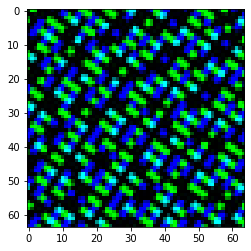

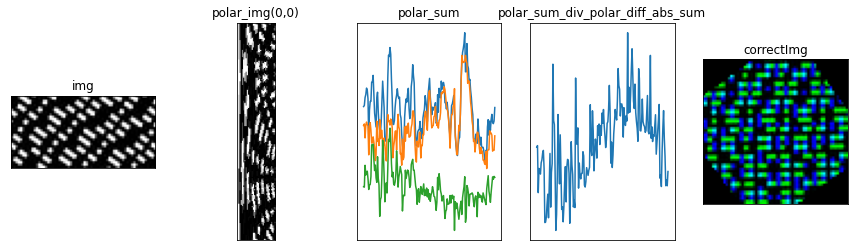

wh= 64
[ 29   0   0   8   0 149 209  30   0   1  61   0  68 186  24   0]
maxIndex= 6
209
offsetDegree= 135


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


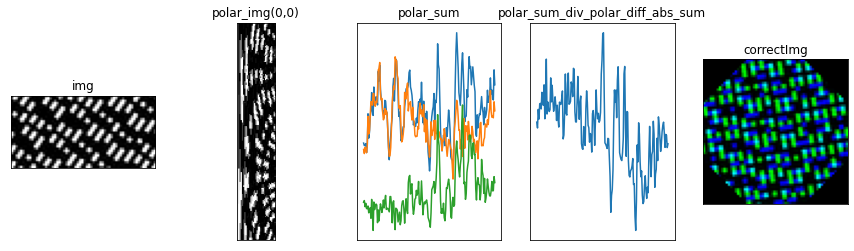

offsetDegree= 45


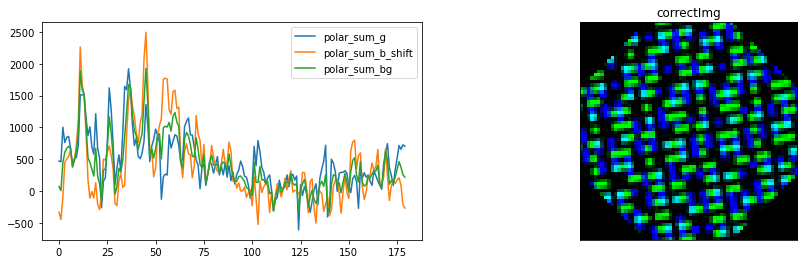

In [420]:
bigMap="img/2018_org_narrow_2.tiff"
orgImg = cv2.cvtColor(cv2.imread(bigMap), cv2.COLOR_BGR2RGB)

#Question
y=100;
x=200;
wh=128
#wh=64
orgImg_crop128=orgImg[y: y + wh, x: x + wh ]
plt.imshow(orgImg_crop128)
a=55
orgImg_crop128_a33=imgWrapA(orgImg_crop128,a)

#Answer
offset=0
orgImg_crop128_a33_crop=orgImg_crop128_a33[int(wh/4)+offset: int(3*wh/4)+offset , int(wh/4): int(3*wh/4)]
plt.imshow(orgImg_crop128_a33_crop)

polarWarp(orgImg_crop128_a33_crop)


    




In [421]:
print(orgImg_crop128_a33[int(wh/4):int(wh/8*3), int(wh/2),1])

[ 19   0   0   4   0 131 255 218   8   0  68   0   0   0   0 201]


In [422]:
print(orgImg_crop128_a33[int(wh/4):int(wh/8*3), int(wh/2),2])

[ 29   0   0   8   0 149 209  30   0   1  61   0  68 186  24   0]
